<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goals</a></span></li><li><span><a href="#Define-our-model-(y-intercept-and-slope)" data-toc-modified-id="Define-our-model-(y-intercept-and-slope)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define our model (y-intercept and slope)</a></span><ul class="toc-item"><li><span><a href="#Generate-data-without-noise-and-plot-it." data-toc-modified-id="Generate-data-without-noise-and-plot-it.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate data without noise and plot it.</a></span></li><li><span><a href="#Create-noise-and-add-to-data" data-toc-modified-id="Create-noise-and-add-to-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create noise and add to data</a></span></li><li><span><a href="#Let's-fit-a-curve-to-this...." data-toc-modified-id="Let's-fit-a-curve-to-this....-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Let's fit a curve to this....</a></span></li></ul></li><li><span><a href="#Error-and-covariance" data-toc-modified-id="Error-and-covariance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Error and covariance</a></span></li><li><span><a href="#How-do-we-know-that-normal-really-gives-us-a-normal-distribution?" data-toc-modified-id="How-do-we-know-that-normal-really-gives-us-a-normal-distribution?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How do we know that <code>normal</code> really gives us a normal distribution?</a></span><ul class="toc-item"><li><span><a href="#Looks-good,-but-how-do-we-check-that-this-is-normal?-Fit-a-normal-distribution-to-the-histogram" data-toc-modified-id="Looks-good,-but-how-do-we-check-that-this-is-normal?-Fit-a-normal-distribution-to-the-histogram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Looks good, but how do we check that this is normal? Fit a normal distribution to the histogram</a></span></li><li><span><a href="#Calculate-bin-centers..." data-toc-modified-id="Calculate-bin-centers...-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculate bin centers...</a></span></li><li><span><a href="#...and-fit-a-Gaussian" data-toc-modified-id="...and-fit-a-Gaussian-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>...and fit a Gaussian</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np

%matplotlib notebook
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

## Goals

+ Fit a curve to data
+ Generate random numbers with a Gaussian (normal) distribution 
+ Fit curve to data with noise
+ Calculate uncertainty in fit
+ Fit curve to distribution of random numbers

## Define our model (y-intercept and slope)

In [3]:
slope_input = 5
y_intercept_input = 2
num_points = 1000

In [4]:
x = np.linspace(0, 10, num=num_points)

In [5]:
def line(x, m, b):
    """

    """
    return m * x + b

### Generate data without noise and plot it.

In [6]:
y_perfect = line(x, slope_input, y_intercept_input)

<IPython.core.display.Javascript object>


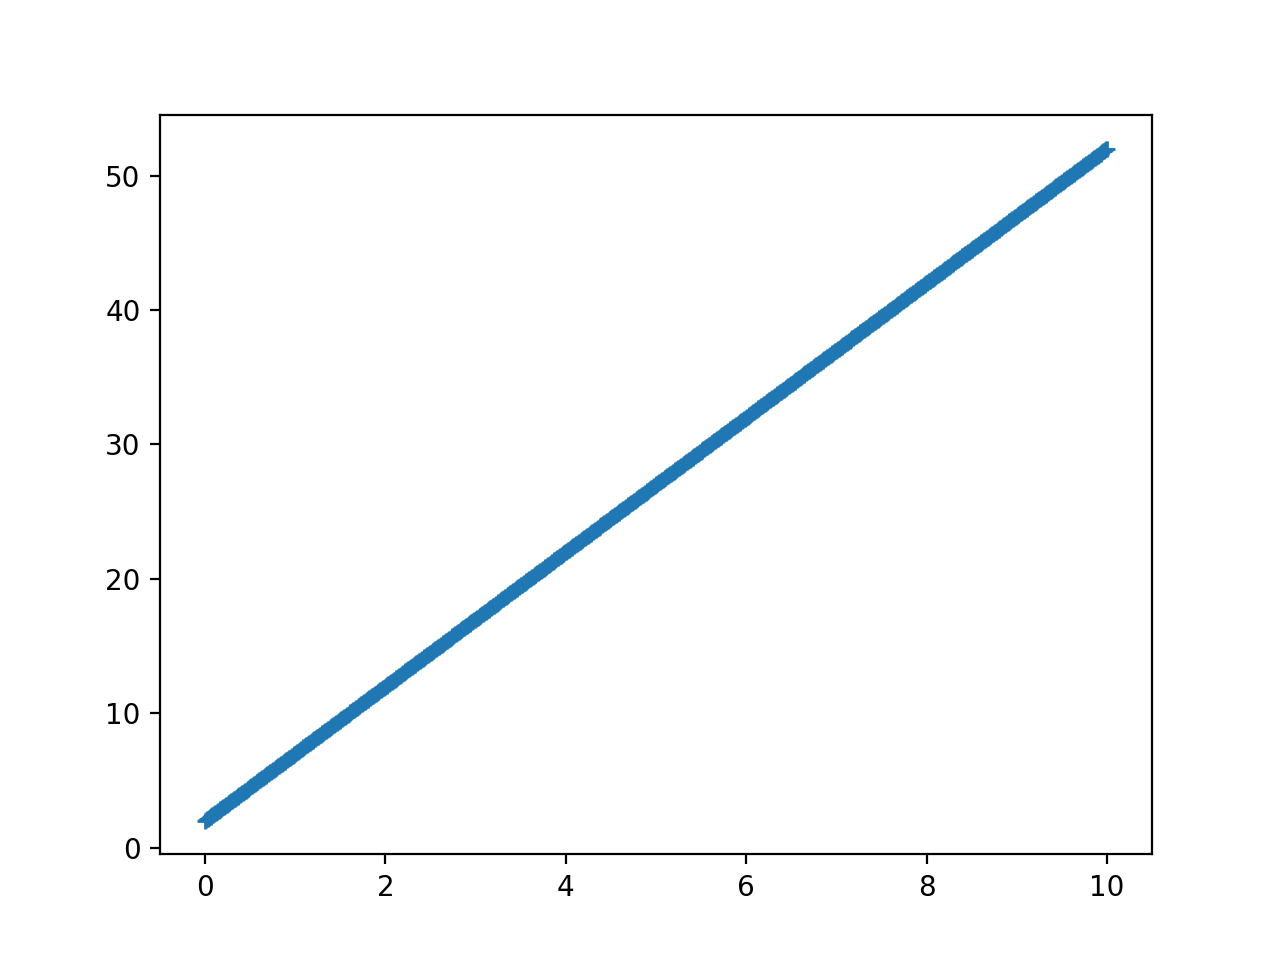

In [7]:
plt.figure()
plt.plot(x, y_perfect, '+')

### Create noise and add to data

In [8]:
noise = np.random.normal(loc=0, scale=2, size=x.shape)

In [9]:
y_real = y_perfect + noise

<IPython.core.display.Javascript object>


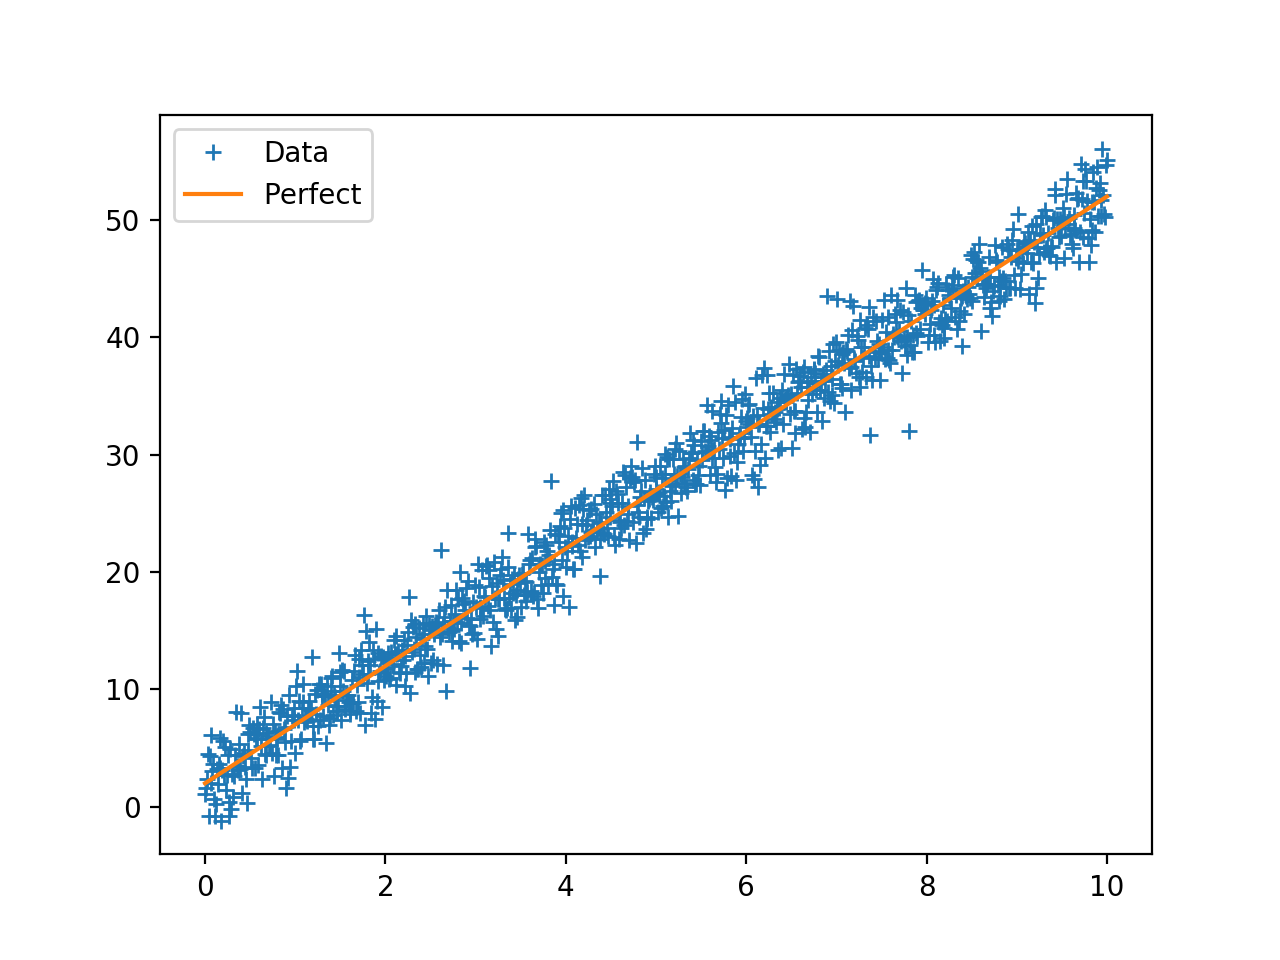

In [10]:
plt.figure()
plt.plot(x, y_real, '+', label='Data') 
plt.plot(x, y_perfect, label='Perfect')
plt.legend()

### Let's fit a curve to this....

In [11]:
fit_parameters, covariance = curve_fit(line, x, y_real, p0=[0, 0])

Print out the fit parameters (they are in the same order as the arguments to `line`, defined above.

In [12]:
print(fit_parameters)

[4.97688523 2.16015561]


<IPython.core.display.Javascript object>


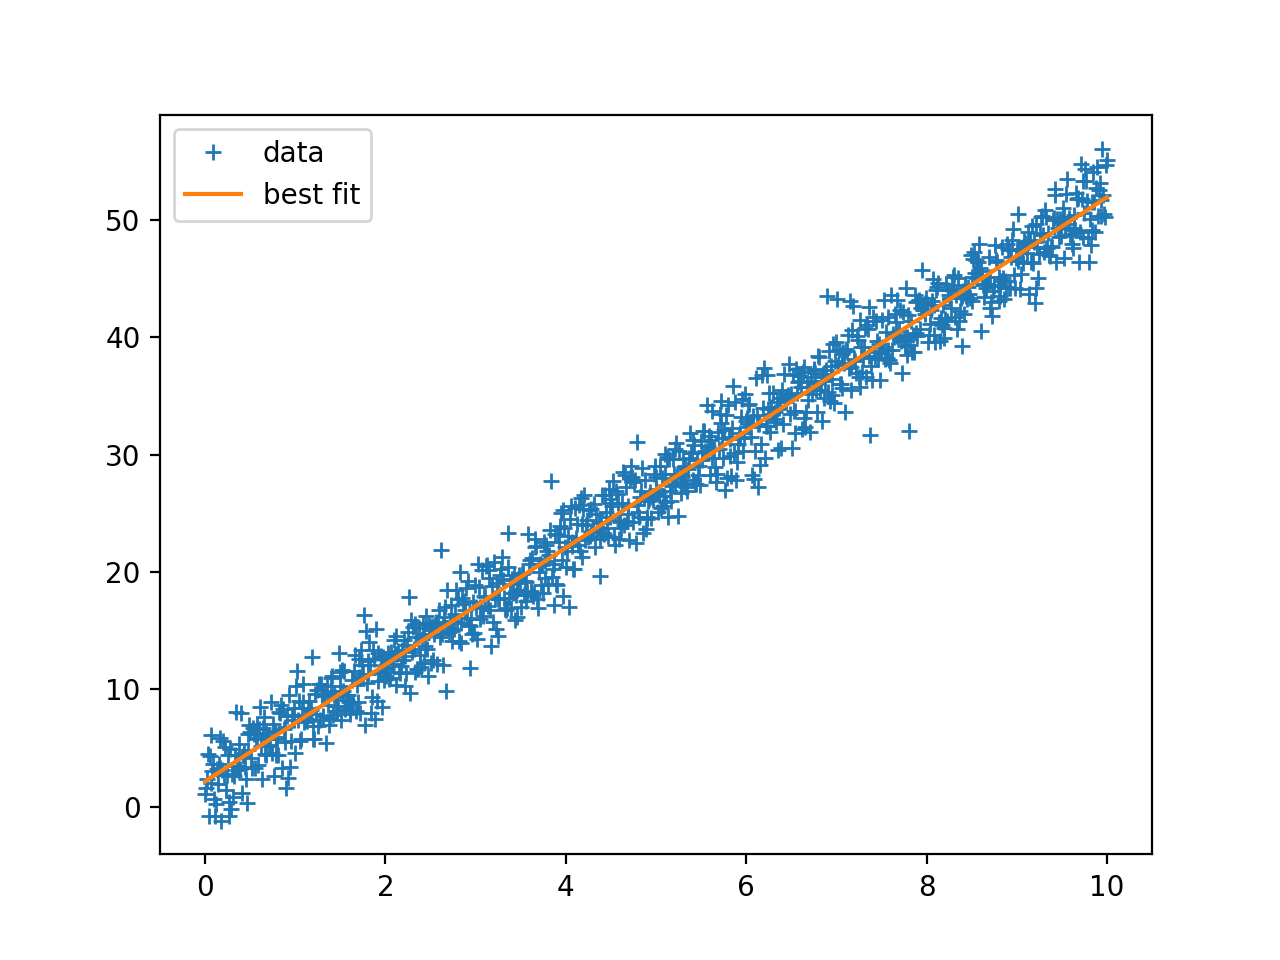

In [13]:
y_model = line(x, *fit_parameters)
plt.figure()
plt.plot(x, y_real, '+', label='data')
plt.plot(x, y_model, label='best fit') 
plt.legend()

## Error and covariance

In [14]:
covariance

array([[ 0.0004794 , -0.002397  ],
       [-0.002397  ,  0.01598801]])

Uncertainties in the fit parameters are the square root of the diagonal elements of the covariance.

In [15]:
uncertainty_in_slope = np.sqrt(covariance[0, 0])
uncertainty_in_intercept = np.sqrt(covariance[1, 1])

In [16]:
print(uncertainty_in_slope)
print(uncertainty_in_intercept)

0.021895212641460524
0.12644370159938148


## How do we know that `normal` really gives us a normal distribution?

<IPython.core.display.Javascript object>


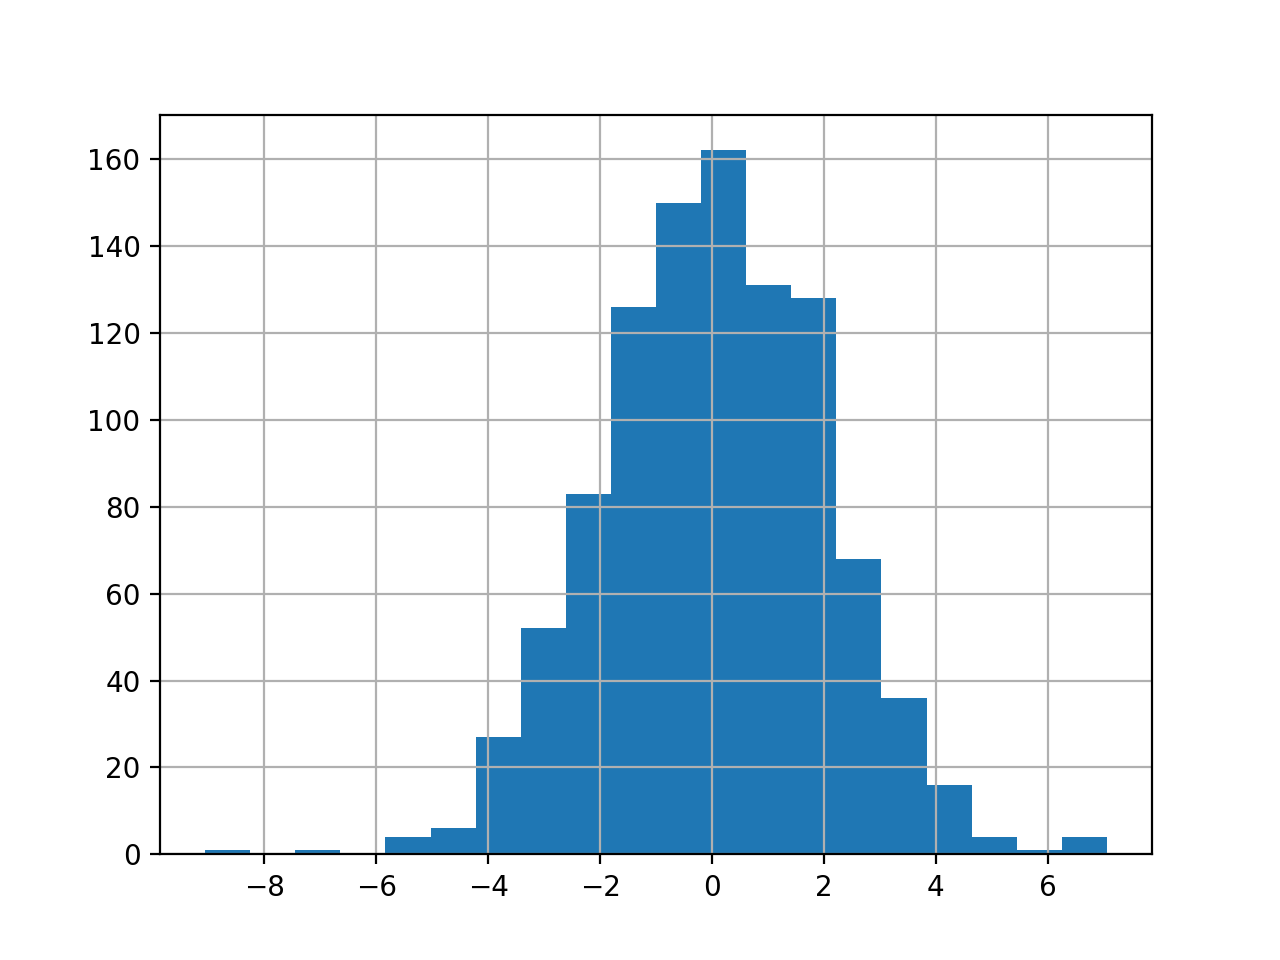

In [17]:
plt.figure()
plt.hist(noise, bins=20)
plt.grid()

### Looks good, but how do we check that this is normal? Fit a normal distribution to the histogram

It turns out that `plt.hist()` returns three things:

+ `histogram`, the number of counts in each bin. If there are $N$ of these then there are $N + 1$ `bins`.
+ `bin_edges`, the location of the *edges* of each bin.
+ `patches`, the boxes that matplotlib draws on the screen for the histogram.

To fit a normal (Gaussian) distribution to the histogram we need the position of the bin *centers* and the number of counts in each bin.

*One important note:* since the Gaussian function we implemented is nromalized (i.e. area under the curve is one) we need to tell matplotlib to produce a normalized histogram. The `density` argumen to `plt.hist()` does that in the cell below.

<IPython.core.display.Javascript object>


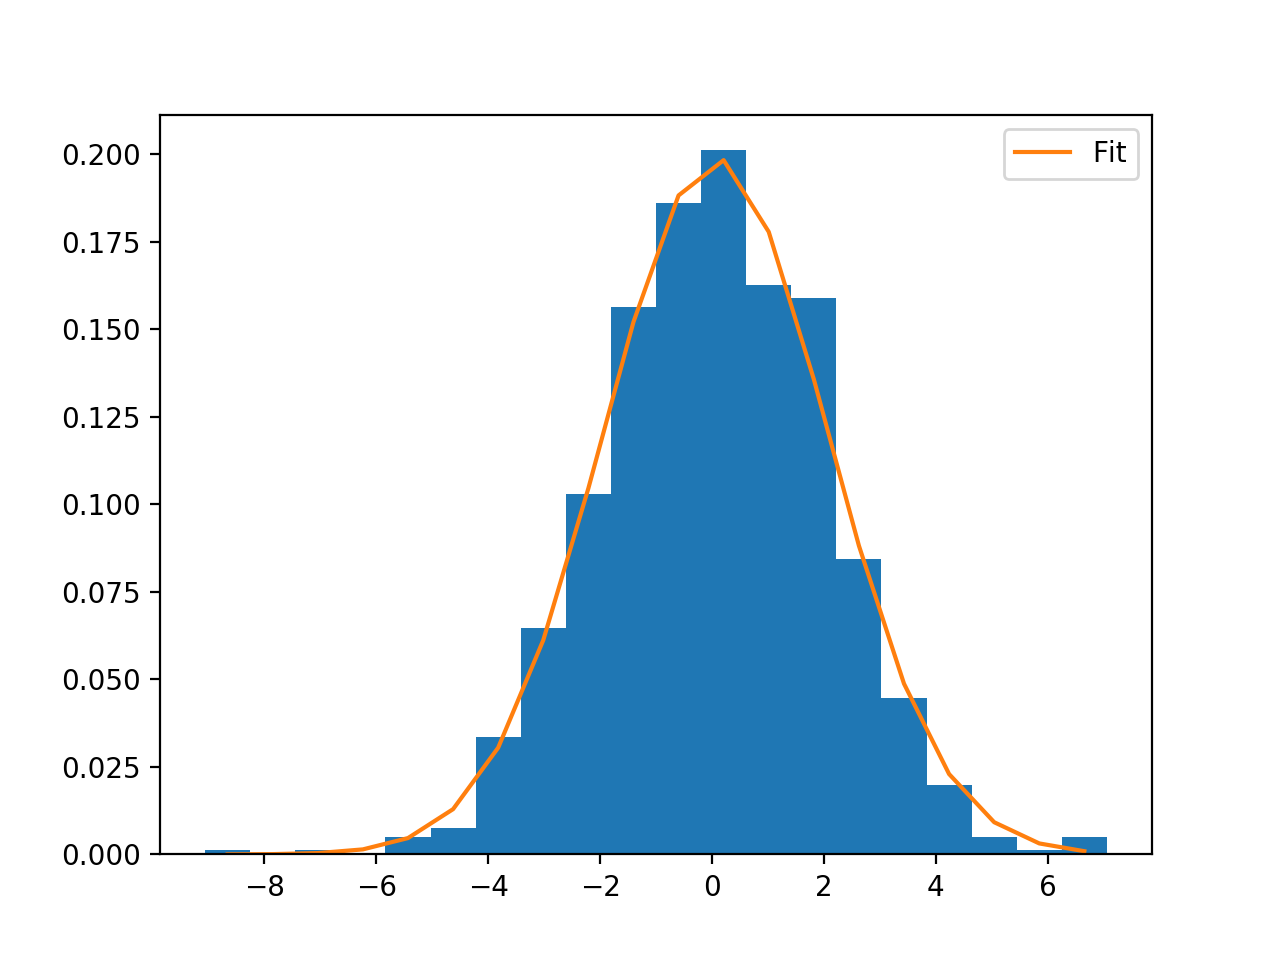

In [18]:
plt.figure()
hist, bin_edges, patches = plt.hist(noise, bins=20, density=True)

### Calculate bin centers...

In [19]:
bin_center = (bin_edges[1:] + bin_edges[:-1]) / 2

### ...and fit a Gaussian

THIS CELL WILL FAIL WHEN YOU TRY IT because it requires a Gaussian function that you will implement in lab. The `gauss` function has signature `gauss(x, mu, sigma)`. It returns

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},
$$

where $\mu$ is the position of the center of the distribution and $\sigma$ is the standard deviation of the Gaussian.

In [20]:
print(len(bin_center), len(hist))

20 20


Fit the Gaussian

In [21]:
from functions import gauss

fit_param_gauss, covar_gauss = curve_fit(gauss, bin_center, hist, p0=[1, 1])
print('Fit parameters are: ', fit_param_gauss)
print('Uncertainties are: ', np.sqrt(covar_gauss.diagonal()))

Fit parameters are:  [0.06733391 2.00726952]
Uncertainties are:  [0.04894915 0.03996795]


Add a graph of it to the plot above.

In [22]:
plt.plot(bin_center, gauss(bin_center, *fit_param_gauss), label='Fit')
plt.legend()